## 기본 Pandas 예제

이 노트북은 기본적인 Pandas 개념을 안내합니다. 먼저 일반적인 데이터 과학 라이브러리를 가져오는 것부터 시작하겠습니다:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 시리즈

시리즈는 리스트나 1차원 배열과 비슷하지만, 인덱스를 가지고 있습니다. 모든 연산은 인덱스에 맞춰 수행됩니다.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


시리즈의 일반적인 사용 사례 중 하나는 **시계열**입니다. 시계열에서는 인덱스가 특별한 구조를 가지며, 일반적으로 날짜나 시간 범위로 구성됩니다. 이러한 인덱스는 `pd.date_range`를 사용하여 생성할 수 있습니다.

예를 들어, 매일 구매한 제품의 수량을 나타내는 시리즈가 있고, 매주 일요일마다 우리 자신을 위해 한 개의 제품을 추가로 가져가야 한다고 가정해봅시다. 이를 시리즈를 사용하여 다음과 같이 모델링할 수 있습니다:


Length of index is 366


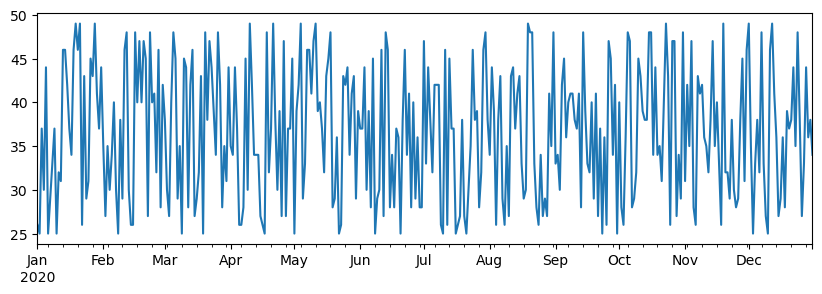

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


보시다시피, 여기에서 문제가 발생하고 있습니다. 주간 시리즈에서 언급되지 않은 날짜는 누락된 것으로 간주되며 (`NaN`), 숫자에 `NaN`을 더하면 `NaN`이 됩니다. 올바른 결과를 얻으려면 시리즈를 더할 때 `fill_value`를 지정해야 합니다.


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


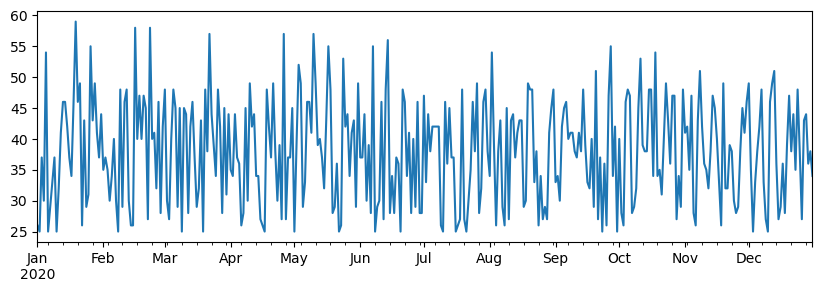

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

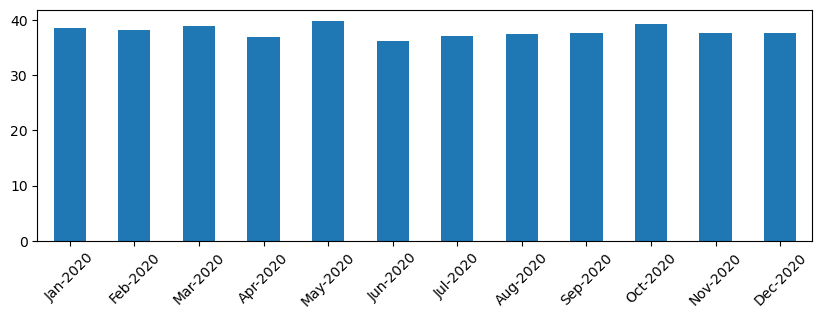

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## 데이터프레임

데이터프레임은 기본적으로 동일한 인덱스를 가진 여러 시리즈의 모음입니다. 우리는 여러 시리즈를 결합하여 데이터프레임을 만들 수 있습니다. 위에서 정의된 `a`와 `b` 시리즈를 기준으로:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

우리는 또한 Series를 열로 사용할 수 있으며, 사전(dictionary)을 사용하여 열 이름을 지정할 수 있습니다:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

동일한 결과는 전치(그런 다음 이전 예제와 일치하도록 열 이름 변경)를 통해 얻을 수 있습니다.


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**데이터프레임에서 열 선택**은 다음과 같이 할 수 있습니다:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**필터 표현**을 기반으로 행 선택:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

표현식 `df['A']<5`는 불리언 시리즈를 반환하며, 시리즈의 각 요소에 대해 표현식이 `True`인지 `False`인지를 나타냅니다. 시리즈가 인덱스로 사용될 때, DataFrame에서 행의 하위 집합을 반환합니다. 따라서 임의의 Python 불리언 표현식을 사용하는 것은 불가능하며, 예를 들어 `df[df['A']>5 and df['A']<7]`라고 작성하는 것은 잘못된 방식입니다. 대신, 불리언 시리즈에 대한 특별한 `&` 연산을 사용해야 합니다:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**새로운 계산 가능한 열 생성**. 직관적인 표현을 사용하여 DataFrame에 새로운 계산 가능한 열을 쉽게 생성할 수 있습니다. 아래 코드는 A의 평균값으로부터의 발산을 계산합니다.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

우리가 실제로 하는 것은 일련의 값을 계산한 다음, 이 값을 왼쪽에 할당하여 또 다른 열을 생성하는 것입니다.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**숫자를 기준으로 행 선택**은 `iloc` 구조를 사용하여 수행할 수 있습니다. 예를 들어, DataFrame에서 처음 5개의 행을 선택하려면:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**그룹화**는 종종 Excel의 *피벗 테이블*과 유사한 결과를 얻기 위해 사용됩니다. 예를 들어, `LenB`의 각 숫자에 대해 열 `A`의 평균 값을 계산하고 싶다고 가정해 봅시다. 그러면 우리는 `LenB`로 DataFrame을 그룹화하고 `mean`을 호출할 수 있습니다:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

그룹에서 평균과 요소 수를 계산해야 한다면, 더 복잡한 `aggregate` 함수를 사용할 수 있습니다.


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## 출력 및 시각화

데이터 과학자는 데이터를 탐색해야 할 때가 많으므로 데이터를 시각화하는 능력이 중요합니다. DataFrame이 클 경우, 종종 우리가 모든 작업을 올바르게 수행하고 있는지 확인하기 위해 처음 몇 줄만 출력해보고 싶을 때가 있습니다. 이는 `df.head()`를 호출하여 수행할 수 있습니다. Jupyter Notebook에서 실행하면 DataFrame이 깔끔한 표 형태로 출력됩니다.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

우리는 또한 `plot` 함수를 사용하여 몇몇 열을 시각화하는 방법을 보았습니다. `plot` 함수는 많은 작업에 매우 유용하며, `kind=` 매개변수를 통해 다양한 그래프 유형을 지원하지만, 더 복잡한 것을 그릴 때는 항상 기본 `matplotlib` 라이브러리를 사용할 수 있습니다. 데이터 시각화는 별도의 강의에서 자세히 다룰 예정입니다.


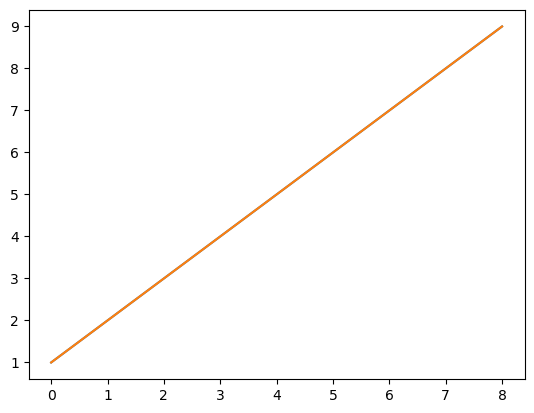

In [61]:
df['A'].plot()
plt.show()

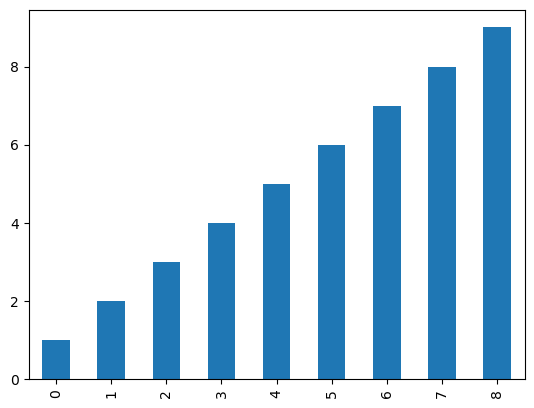

In [63]:
df['A'].plot(kind='bar')
plt.show()

이 개요는 Pandas의 가장 중요한 개념들을 다루고 있지만, 이 라이브러리는 매우 풍부하며 이를 활용하여 할 수 있는 일에는 한계가 없습니다! 이제 이 지식을 활용하여 특정 문제를 해결해 봅시다.



---

**면책 조항**:  
이 문서는 AI 번역 서비스 [Co-op Translator](https://github.com/Azure/co-op-translator)를 사용하여 번역되었습니다. 정확성을 위해 최선을 다하고 있으나, 자동 번역에는 오류나 부정확성이 포함될 수 있습니다. 원본 문서의 원어 버전을 신뢰할 수 있는 권위 있는 자료로 간주해야 합니다. 중요한 정보의 경우, 전문적인 인간 번역을 권장합니다. 이 번역 사용으로 인해 발생하는 오해나 잘못된 해석에 대해 책임을 지지 않습니다.
